## Importing of Libraries
Here We imported the libraries needed for training, testing and exploring our dataset such as pandas, numpy, matplotlib, etc

In [305]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%reload_ext lab_black

## Read the Data
Creating a function to read the data and display a dataframe 

In [306]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ',', '\t', etc

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of data: {data.shape}\n")
    return data

In [307]:
Ulta_reviews = load_data(filename="Ulta Skincare Reviews.csv")

Ulta_reviews.head(1)

Shape of data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23




### Data Columns

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```



<br><hr>

# Exploratory Data Analyis
For this data set, the following exploratory analysis will be performed
- checking for null values
- filling the missing values
- checking the data type
- splitting into numerical and categorical data
- using a count plot to plot the categorical variables
- using histograms to plot the numerical variables
- plotting for products with corresponding number of good and bad reviews
- plotting the number of customers with issues
- plotting most common issues associated with customers


#### Checking for null values

In [308]:
Ulta_reviews.isnull().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

#### Filling null values with unknown

In [309]:
Ulta_reviews.fillna("Unknown", inplace=True)

In [310]:
Ulta_reviews.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

#### Checking for datatype
The following data contains both strings and integers

In [311]:
Ulta_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4150 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4150 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [312]:
dir(Ulta_reviews)

['Brand',
 'Product',
 'Review_Date',
 'Review_Downvotes',
 'Review_Location',
 'Review_Text',
 'Review_Title',
 'Review_Upvotes',
 'Scrape_Date',
 'T',
 'Verified_Buyer',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__'

#### Splitting the data into numerical and categorical data

In [313]:
numerical_data = Ulta_reviews.select_dtypes(include="number")
categorical_data = Ulta_reviews.select_dtypes(exclude="number")

categorical_data.head(1)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


#### Checking for number of unique values
This was done to know the number of unique values  for each column and which columns can be plotted

In [314]:
categorical_data.nunique()

Review_Title       2828
Review_Text        3662
Verified_Buyer        2
Review_Date          41
Review_Location    1424
Product               4
Brand                 1
Scrape_Date           1
dtype: int64

#### Creating a function that plots the categorical variables


In [315]:
def plot_counts(
    *,
    data: pd.DataFrame,
    features: list[str],
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a count plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.countplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")

        labels = sorted(data[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=80)
    fig.tight_layout()
    plt.show()

#### Plotting the categorical variables
With the function plot counts, we answer the following questions 
- which of the buyers are verified or not?
- Which product was used  more?

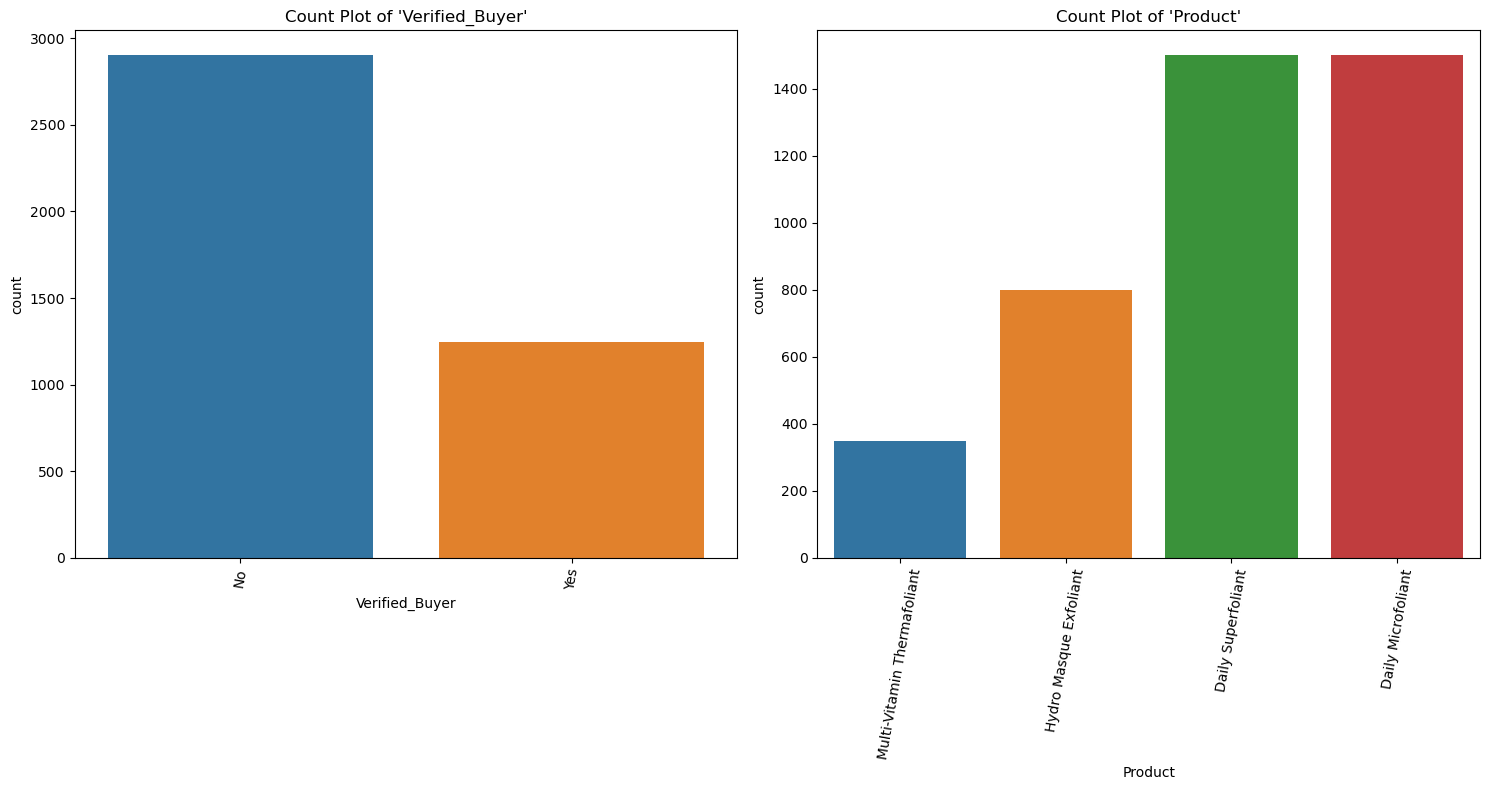

In [316]:
cat2 = ["Verified_Buyer", "Product"]

plot_counts(data=categorical_data, features=cat2, n_rows=1, n_cols=2)

The above plot demonstrates the following:
- Most of the buyers are not verified buyers
- Daily Superfoliant and Daily Microfoliant are the most popular products

#### Creating a function for the numerical variables

In [317]:
def histograms(
    *,
    data: pd.DataFrame,
    features: list[str],
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a histogram of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.histplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Histogram of {feat!r}")

        labels = sorted(data[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=80)
    fig.tight_layout()
    plt.show()

#### Checking how many upvotes and downvotes per review

In [318]:
numerical_data.Review_Upvotes.value_counts(normalize=True).mul(100).sort_index()

0     75.855422
1     13.060241
2      5.277108
3      2.144578
4      1.156627
5      0.698795
6      0.265060
7      0.385542
8      0.120482
9      0.216867
10     0.120482
11     0.096386
12     0.144578
13     0.096386
14     0.120482
15     0.048193
16     0.024096
17     0.024096
19     0.024096
20     0.024096
25     0.048193
47     0.024096
84     0.024096
Name: Review_Upvotes, dtype: float64

In [319]:
numerical_data.Review_Downvotes.value_counts(normalize=True).mul(100).sort_index()

0     91.204819
1      6.313253
2      1.301205
3      0.457831
4      0.168675
5      0.072289
6      0.048193
7      0.144578
8      0.024096
9      0.144578
10     0.024096
11     0.024096
13     0.024096
14     0.024096
35     0.024096
Name: Review_Downvotes, dtype: float64

With the histograms function we plot the numerical variable 

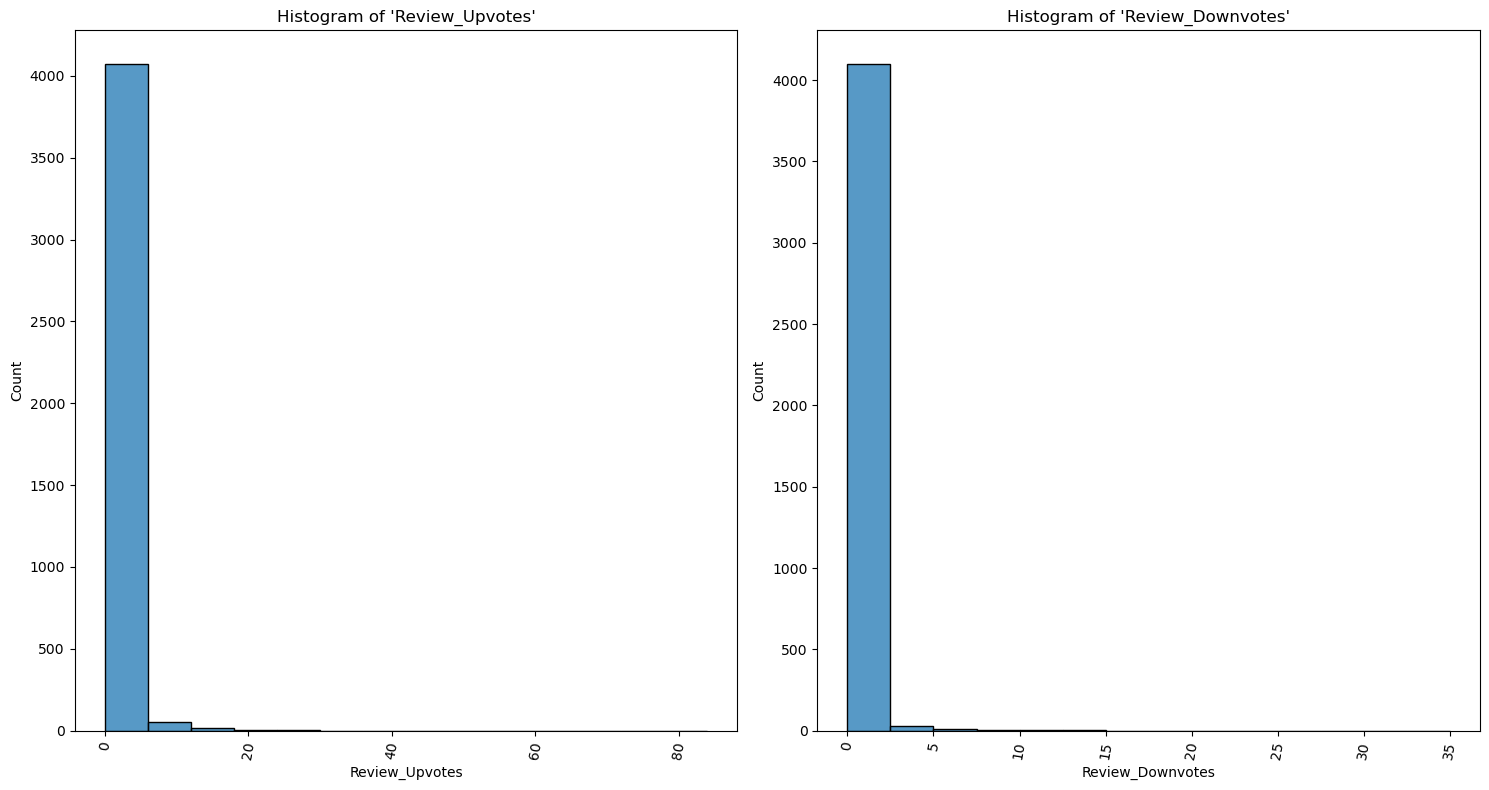

In [320]:
# to plot the numerical variables
numerical_data.nunique()

histograms(
    data=numerical_data, features=list(numerical_data.columns), n_rows=1, n_cols=2
)

 The plt demonstrates the folowing
- 75% of reviews had 0 upvotes
- Over 90% of reviews had 0 downvotes

### Which product had the most good and bad reviews?
Using regex functions we find positive words among the data and create a dataframe with only good reviews.Using only a portion of good reviews , we can higlight which of the product had the most good reviews

In [321]:
pattern = r"love|obsessed|adore|pleased"
good_reviews = Ulta_reviews[Ulta_reviews["Review_Text"].str.contains(pat=pattern)]

good_reviews.head(1)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [322]:
good_reviews.shape

(1046, 10)

#### Creating a function for plotting a countplot

In [323]:
# to create a countplot of features
def count_plot(*, data: pd.DataFrame, feat: str) -> "Plot":
    """to create a count plot of features"""
    sns.countplot(data=data, x=feat)
    plt.tick_params(axis="x", rotation=45)
    plt.title(f"Count plot of {feat!r}")
    plt.show

 A count plot of the number of good reviews

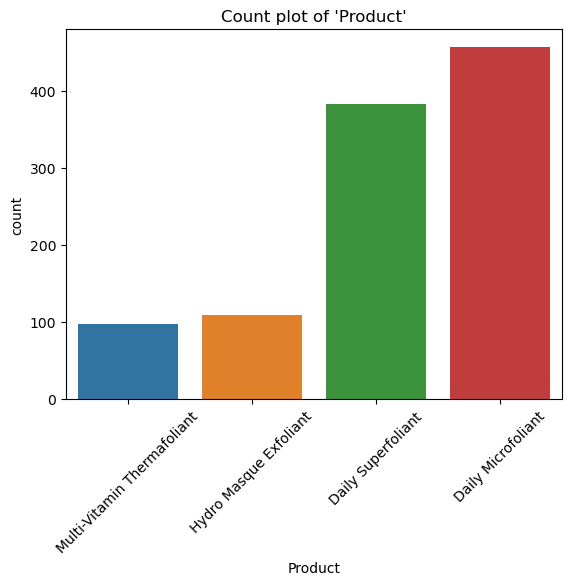

In [324]:
count_plot(data=good_reviews, feat="Product")

It seems that the Daily Microfoliant has the highest number of good reviews and Mult-Vitamin Thermafoliant had the least. 

##### For the bad reviews
using a couple of commom, negative words, we generate a datframe containing a portion of bad reviews

In [325]:
pattern_bad = r"heartbroken|unnoticeable|useless|\bbs\b|disliked|disappointed"
bad_reviews = Ulta_reviews[Ulta_reviews["Review_Text"].str.contains(pat=pattern_bad)]

bad_reviews.shape

(43, 10)

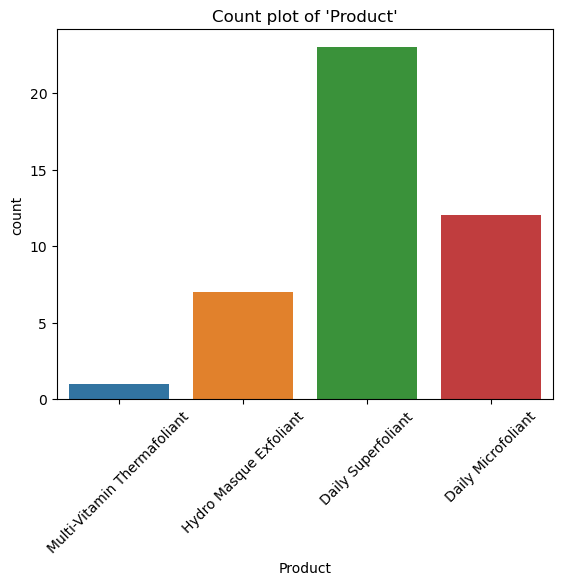

In [326]:
count_plot(data=bad_reviews, feat="Product")

The Daily Superfoliant contains the highest number of bad reviews.

#### Which issues are most common among the reviews
We use regex function to search for common sklin isseus amoong the reviews. With that we we plot a bar chart containing the frequency of this issues to know which is more common

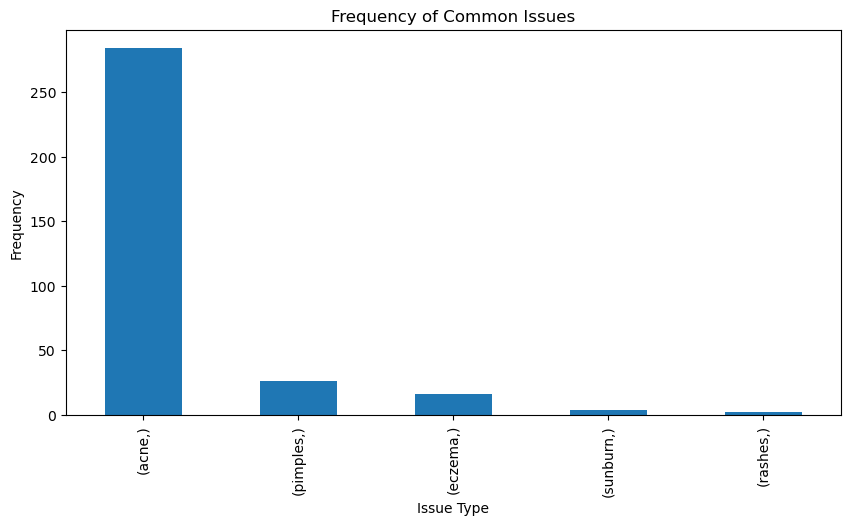

In [327]:
pattern_issue = r"eczema|pimple\w+|acne|rashes|\w+burn"
issues = Ulta_reviews[Ulta_reviews["Review_Text"].str.contains(pat=pattern_issue)]

pattern_issues = r"(eczema|pimple\w+|acne|rashes|\w+burn)"

# count the frequency of each issue type
issue_counts = issues["Review_Text"].str.extractall(pattern_issues).value_counts()


# plot the frequency of each issue type in a bar plot
plt.figure(figsize=(10, 5))
issue_counts.plot(kind="bar")
plt.title("Frequency of Common Issues")
plt.xlabel("Issue Type")
plt.ylabel("Frequency")
plt.show()

The plot demonstrates that the most common issues requiring the use of products is acne followed by pimples

#### Do most buyers have common skincare issues?
Uisng regex functions and piecharts we higlight the percentage of customers who stated their issues as compared to those who didint

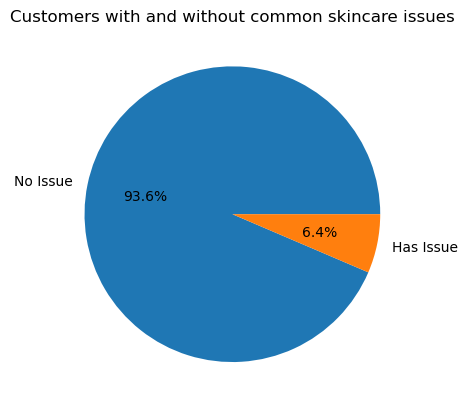

In [328]:
Ulta_reviews["has_issue"] = Ulta_reviews["Review_Text"].str.contains(pat=pattern_issue)
issue_counts = Ulta_reviews.groupby("has_issue").size()
labels = ["No Issue", "Has Issue"]
plt.pie(issue_counts, labels=labels, autopct="%1.1f%%")
plt.title("Customers with and without common skincare issues")
plt.show()

Only 6.4% of reviwers had common issues like acne, pimples etc

### Creating a wordcloud showing the words/phrases commonly associated with each product.

Importing the appropriate library:wordcloud

In [329]:
import spacy
from wordcloud import WordCloud

#### Tokenizing with Spacy

In [330]:
nlp = spacy.load("en_core_web_sm")

text = Ulta_reviews.Review_Text

#### Creating a function to tokenize all the products
Creating a function TOkenizer and BagOfWords, which tokenizes the documents and calculates the bag of words. It returns all the tokenized documents and vocabulary of words used along with the corresponding frequency

In [331]:
class Tokenizer:
    """This is used to tokenize documents"""

    def __init__(self) -> None:
        self.nlp = spacy.load("en_core_web_sm")

    def __call__(self, doc: str, *args: Any, **kwargs: Any) -> list[str]:
        # Tokenize and remove stopwords
        doc = self.nlp(doc)
        tokenized_doc = [word.text.lower() for word in doc if not word.is_stop]
        return tokenized_doc


class BagOfWords1:
    """This tokenizes all the documents and calculates the bag of words.
    i.e all the unique words in the document are stored and counted.

    Returns:
        tokenized_docs (list[int]): Tokenized documents i.e list of
            tokenized documents where every row in the data is a document.
        bag_of_words (dict[str, int]): A dict containing a unique word and the
            unique numeric representation of the word.
    """

    def __init__(self) -> None:
        self.tokenizer = Tokenizer()

    def __call__(
        self, data: pd.DataFrame, *args: Any, **kwargs: Any
    ) -> tuple[list, dict[str, Any]]:
        """This calculates the bag of words."""
        count = 0
        vocabulary = {}
        all_tokenized_docs = []

        for doc in data:
            # Tokenize docs
            tokenized_doc = self.tokenizer(doc=doc)
            doc_as_num = []

            for word in tokenized_doc:
                # Store the unique words as numbers in the dict
                if word not in vocabulary:
                    vocabulary[word] = count
                    count += 1
                # Save the word as a number
                doc_as_num.append(vocabulary.get(word))
            # Store the tokenized docs (converted to numbers) in a list
            all_tokenized_docs.append(doc_as_num)
        return (all_tokenized_docs, vocabulary)

Tokenizing the review column to see the most popular words

In [332]:
bow = BagOfWords1()
tokenized_docs, vocabulary = bow(data=text)

In [ ]:
vocabulary

#### Creating the Wordcloud
With the plot_popular function, I create a wordcloud and plot to demonstrate which words wher most poplular

In [ ]:
def plot_popular(vocab: dict):
    wordcloud = WordCloud(
        width=800, height=800, background_color="white"
    ).generate_from_frequencies(vocab)
    # displaying with matplotlip
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
plot_popular(vocab=vocabulary)

#### For the Multi-Vitamin Thermafoliant
For each product, we create a dataframe containing all the reviews unique to it,tokenize, save it a worcloud and illustrate its most popular words 

In [ ]:
Ulta_reviews["Product"].unique()

In [ ]:
Mvt = Ulta_reviews.loc[
    Ulta_reviews["Product"] == "Multi-Vitamin Thermafoliant", "Review_Text"
]

Mvt

In [ ]:
bow = BagOfWords1()
tokenized_docs_mvt, vocabulary_mvt = bow(data=Mvt)
vocabulary_mvt

In [ ]:
plot_popular(vocab=vocabulary_mvt)

Word most coomonly associated with Multi-Vitamin Thermafoliantare shoulders, chest and stronger

#### For the 'Hydro Masque Exfoliant'

In [ ]:
Hme = Ulta_reviews.loc[
    Ulta_reviews["Product"] == "Hydro Masque Exfoliant", "Review_Text"
]

Hme

In [ ]:
tokenized_docs, vocabulary_hme = bow(data=Hme)

In [ ]:
for key, value in sorted(vocabulary_hme.items(), key=lambda x: x[1], reverse=True):
    print(key, value)

In [ ]:
plot_popular(vocab=vocabulary_hme)

Popular words related to this product include
- rubbed 
- temperatures 
- colder 

#### Daily Superfoliant

In [ ]:
Dsf = Ulta_reviews.loc[Ulta_reviews["Product"] == "Daily Superfoliant", "Review_Text"]

Dsf

In [ ]:
tokenized_docs, vocabulary_dsf = bow(data=Dsf)

In [ ]:
vocabulary_dsf

In [ ]:
plot_popular(vocab=vocabulary_dsf)

Popular words associated with this product inclue:
- soothes
- upcoming
- definetly

#### Daily Microfoliant

In [ ]:
Dmf = Ulta_reviews.loc[Ulta_reviews["Product"] == "Daily Microfoliant", "Review_Text"]

Dmf

In [ ]:
tokenized_docs, vocabulary_dmf = bow(data=Dmf)

In [ ]:
vocabulary_dmf

plot_popular(vocab=vocabulary_dmf)

Popular words related to this product include
- mad 
- useless 
- unnoticeable

##  Performing sentiment analysis
we perform the following functions:
- using sentiment analyzer to detect whether the review was positive or negative
- Encoding positive and negative to values
- plot percentage of positive and negative reviews using a pie chart
- remove stopwords
- lemmatize
-

In [333]:
import nltk

Using Sentiment Intensity Analyzer, we create a column to appropriately detect the type of review, whetehr positive or negative

In [334]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vds = SentimentIntensityAnalyzer()

In [335]:
Ulta_reviews["score"] = Ulta_reviews["Review_Text"].apply(
    lambda review: vds.polarity_scores(review)
)

Ulta_reviews.head(1)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,has_issue,score
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}"


In [336]:
Ulta_reviews["compound"] = Ulta_reviews["score"].apply(
    lambda score_dict: score_dict["compound"]
)

Ulta_reviews.head(1)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,has_issue,score,compound
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964


In [337]:
Ulta_reviews["sentiment"] = Ulta_reviews["compound"].apply(
    lambda c: "positive" if c >= 0 else "negative"
)

Ulta_reviews.head(1)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,has_issue,score,compound,sentiment
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,False,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964,positive


Encoding the positive and negatives values to 1 and 0 respectively

In [338]:
Ulta_reviews_1 = Ulta_reviews.copy()
Ulta_reviews_1["sentiment"] = Ulta_reviews_1["sentiment"].apply(
    lambda x: 1 if x == "positive" else 0
)

Using a pie chart, we plot the percentage of positive and negative reviews

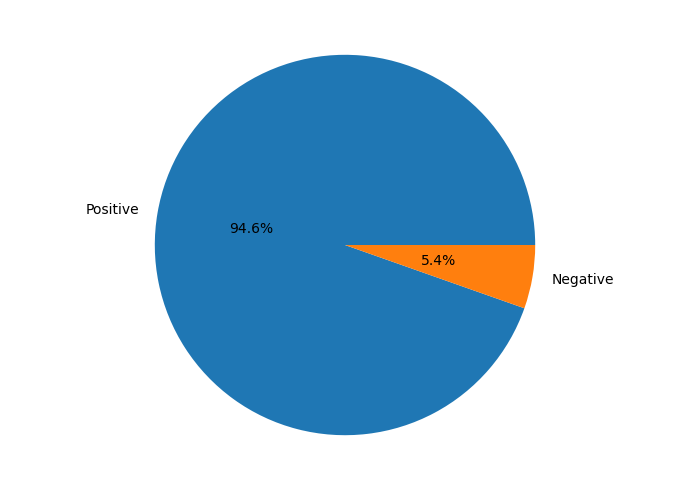

In [339]:
plt.figure(figsize=[7, 5])
plt.axis("equal")


# Plot
plt.pie(
    Ulta_reviews_1["sentiment"].value_counts(),
    labels=["Positive", "Negative"],
    autopct="%1.1f%%",
    pctdistance=0.5,
)

plt.tight_layout()
plt.show()

95% of reviews were positive and 5 % were negative

#### Importing the appropiate stopwords function

In [340]:
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\HP ELITEBOOK 840
[nltk_data]     G2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### writing a  function to remove stopwords and lemmatize in the same function


In [341]:
def sw_lemm(text):
    stopword = set(stopwords.words("english"))

    text = " ".join(word for word in text.split() if word not in stopword)
    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct
    ]
    return " ".join(tokens)

In [ ]:
Ulta_reviews_1["reviewed_text"] = Ulta_reviews_1["Review_Text"].apply(sw_lemm)

In [ ]:
Ulta_reviews_1["reviewed_text"].head()

## MultiNomial Naive Bayes function

#### Importing the appropriate libraries

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from

 #### splitting the data


In [ ]:
X = Ulta_reviews_1["reviewed_text"]
y = Ulta_reviews_1["sentiment"]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(
    X, y, test_size=0.1, random_state=123
)

X_train.shape, X_validate.shape

#### Count Vectorizer or TFIDF Vectorizer
I want to create two machine learning models using two vectorizers, The count Vectorizer and the TFIDF Vectorizer 

In [ ]:
# Using a pipeline to count vectorize and perform the ml model

mnb = MultinomialNB()

cv = CountVectorizer()

pipeline_count = Pipeline(
    steps=[
        # ========column transfomer=======
        ("count_vectorizer", cv),
        # ==========lostic regression======
        ("multi_nomial_nb", mnb),
    ]
)

pipeline_count

#### Fitting and predicting

In [ ]:
# fitting the model
pipeline_count.fit(X_train, y_train)

# predict
ypred_count = pipeline_count.predict(X_validate)

#### Metrics 
Comparing the three metrics(precision, accuracy and roc_auc_score)

In [ ]:
# Check the accuracy
precision = metrics.precision_score(y_validate, ypred_count, average="macro")

print("Precision:", precision)

In [ ]:
count_report = metrics.classification_report(
    y_true=y_validate, y_pred=ypred_count, zero_division=0
)
print(count_report)

In [ ]:
count_r_roc_score = metrics.roc_auc_score(y_true=y_validate, y_score=ypred_count)
count_r_roc_score

#### TFIDF Vectorizer

In [ ]:
# using tfidf vectorizer

tfidf_vec = TfidfVectorizer()

pipeline_tf = Pipeline(
    steps=[
        # ========column transfomer=======
        ("tfidf_vectorizer", tfidf_vec),
        # ==========lostic regression======
        ("multi_nomial_nb", mnb),
    ]
)

pipeline_tf

#### Fitting the model

In [ ]:
# fitting the model
pipeline_tf.fit(X_train, y_train)

# predict
ypred_tf = pipeline_tf.predict(X_validate)

#### Check the precision
Precision is used instead of accuracy as a metric of comparison beacuse 95%of the reviews are positive

In [ ]:
precision_tf = metrics.precision_score(
    y_validate, ypred_tf, average="macro", zero_division=0
)

print("Precision:", precision_tf)

In [ ]:
tfidf_report = metrics.classification_report(
    y_true=y_validate, y_pred=ypred_tf, zero_division=0
)
print(tfidf_report)

In [ ]:
tfidf_r_roc_score = metrics.roc_auc_score(y_true=y_validate, y_score=ypred_tf)
tfidf_r_roc_score

Of the two models, using the Count Vecrorizer is more accurate , producing a precision score of 0.67

#### Logistic Regression

In [ ]:
# Using a pipeline to count vectorize and perform a logistic model
from sklearn.linear_model import LogisticRegression


logit = LogisticRegression()

pipeline_logit = Pipeline(
    steps=[
        # ========column transfomer=======
        ("count_vectorizer", cv),
        # ==========lostic regression======
        ("logit", logit),
    ]
)

pipeline_logit

#### Fitting

In [ ]:
# fitting the model
pipeline_logit.fit(X_train, y_train)

# predict
ypred_log = pipeline_logit.predict(X_validate)

In [ ]:
# Check the precision
precision_log = metrics.precision_score(
    y_validate, ypred_log, average="macro", zero_division=0
)

print("Precision:", precision_log)

##### Conclusion: In order to predict accutrately predict a new review, th elogistic regression model should be used as it has the highest precision